In [1]:
import pandas as pd
import matplotlib.pyplot as plt

police = pd.read_csv('E:/DQLab/Dataset/Datacamp/police.csv')
print(police.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [2]:
# Count the number of missing values in each column
print(police.info(memory_usage=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)None


In [3]:
# Count the number of missing values in each column
print(police.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [4]:
# Examine the shape of the DataFrame
print("Before column deletion : %d rows, %d columns" % police.shape)

# Drop the 'county_name' and 'state' columns
police.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print("\nAfter column deletion : %d rows, %d columns" %police.shape)

Before column deletion : 91741 rows, 15 columns

After column deletion : 91741 rows, 13 columns


In [5]:
# Drop all rows that are missing 'driver_gender'
police.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(police.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [6]:
# Examine the shape of the DataFrame
print(police.shape)

(86536, 13)


In [7]:
# Change the data type of 'is_arrested' to 'bool'
police['is_arrested'] = police.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(police.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


In [8]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = police['stop_date'].str.cat(police['stop_time'], sep=' ')

# Convert 'combined' to datetime format
police['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(police.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [9]:
# Set 'stop_datetime' as the index
police.set_index('stop_datetime', inplace=True)

# Examine the index
print(police.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


In [10]:
# Count the unique values in 'violation'
print(police.violation.value_counts())

print("--------------------------------")

# Express the counts as proportions
print(police.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
--------------------------------
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [11]:
# Create a DataFrame of female drivers
female = police[police['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = police[police['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print("Female Violation :\n", female.violation.value_counts(normalize=True))

print("---------------------------------") 

# Compute the violations by male drivers (as proportions)
print("Male Violation :\n", male.violation.value_counts(normalize=True))

# # Single line
# police.groupby('driver_gender')['violation'].value_counts(normalize=True)

Female Violation :
 Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
---------------------------------
Male Violation :
 Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [12]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = police[(police['driver_gender'] == 'F') & (police['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = police[(police['driver_gender'] == 'M') & (police['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("Female Speeding :\n",female_and_speeding.stop_outcome.value_counts(normalize=True))

print("---------------------------------") 

# Compute the stop outcomes for male drivers (as proportions)
print("Male Speeding :\n", male_and_speeding.stop_outcome.value_counts(normalize=True))

# # Single line 
# police[police['violation'] == 'Speeding'].groupby('driver_gender')['stop_outcome'].value_counts(normalize=True)

Female Speeding :
 Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
---------------------------------
Male Speeding :
 Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [13]:
# Calculate the search rate by counting the values
print(police['search_conducted'].value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(police['search_conducted'].mean())

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [14]:
# Calculate the search rate for both groups simultaneously
print(police.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [15]:
# Calculate the search rate for each combination of gender and violation
print(police.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [16]:
# Reverse the ordering to group by violation before gender
print(police.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [17]:
# Count the 'search_type' values
print(police.search_type.value_counts())

print("--------------------------")
# Check if 'search_type' contains the string 'Protective Frisk'
police['frisk'] = police.search_type.str.contains('Protective Frisk', na=False)

# # Check the data type of 'frisk'
# print(police.frisk.dtype)

# Take the sum of 'frisk'
print("Number of drivers being searched : ", police['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [18]:
# Create a DataFrame of stops in which a search was conducted
searched = police[police.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched['frisk'].mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [19]:
# Calculate the overall arrest rate
print("Rata-rata penangkapan :", police['is_arrested'].mean())

# Calculate the hourly arrest rate
print("Rata-rata penangkapan per jam :\n", police.groupby(police.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = police.groupby(police.index.hour).is_arrested.mean()

Rata-rata penangkapan : 0.0355690117407784
Rata-rata penangkapan per jam :
 stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


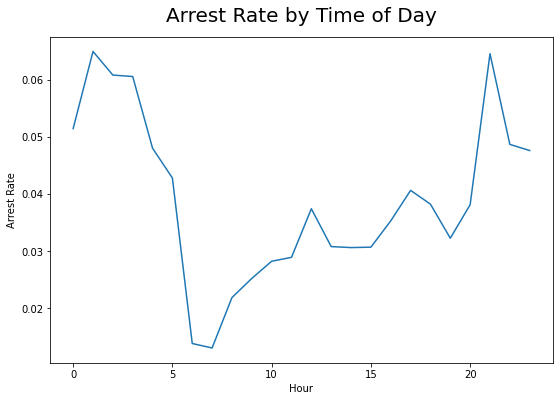

In [20]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the title, ylabel, and ylabel
plt.title("Arrest Rate by Time of Day", fontsize=20, pad=15)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.gcf().set_size_inches(9, 6)
# Display the plot
plt.show()

In [21]:
# Calculate the annual rate of drug-related stops
print(police.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = police.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


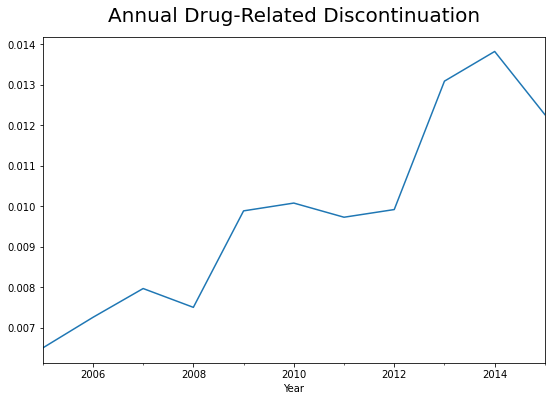

In [22]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

plt.title("Annual Drug-Related Discontinuation", fontsize=20, pad=15)
plt.xlabel("Year")
plt.gcf().set_size_inches(9, 6)
# Display the plot
plt.show()

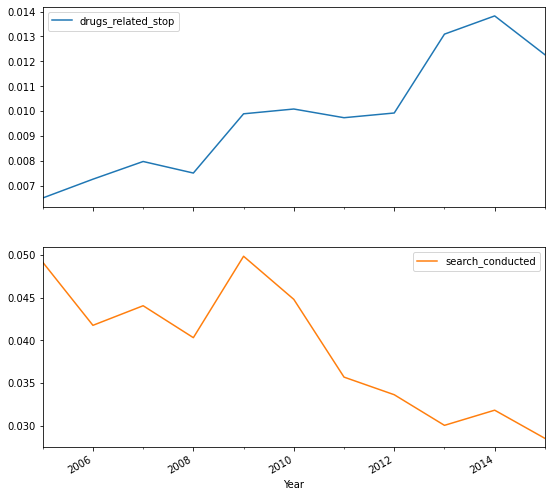

In [23]:
# Calculate and save the annual search rate
annual_search_rate = police.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)
plt.xlabel("Year")
plt.gcf().set_size_inches(9, 9)
# Display the subplots
plt.show()

In [24]:
# Create a frequency table of districts and violations
print(pd.crosstab(police.district, police.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(police.district, police.violation)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [25]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


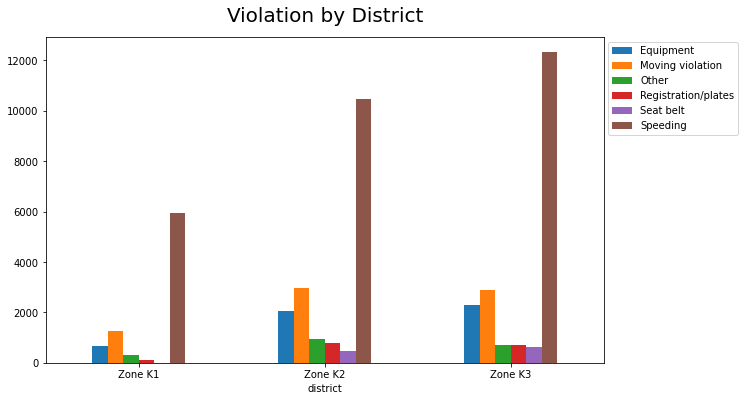

In [26]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')
plt.title("Violation by District", fontsize=20, pad=15)
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=[1.25, 1.0])
plt.gcf().set_size_inches(10, 6)
# Display the plot
plt.show()

In [27]:
# Print the unique values in 'stop_duration'
print(police.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
police['stop_minutes'] = police.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(police['stop_minutes'].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


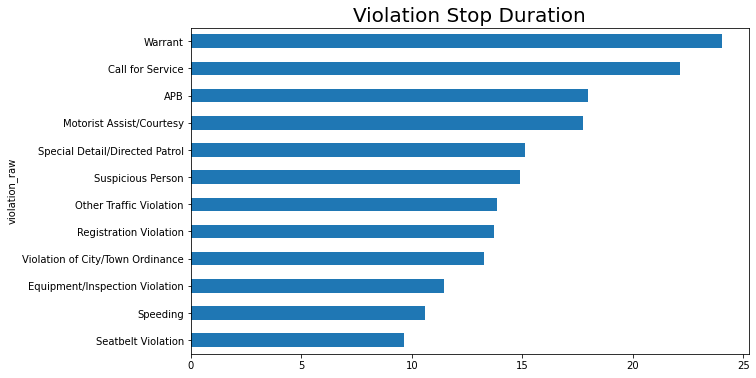

In [28]:
# Save the resulting Series as 'stop_length'
stop_length = police.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
plt.title("Violation Stop Duration", fontsize=20)
plt.gcf().set_size_inches(10, 6)
# Display the plot
plt.show()

Part 2

In [29]:
weather = pd.read_csv('E:/DQLab/Dataset/Datacamp/weather.csv')
print(weather.head())

       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]


In [30]:
# Display column name
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [31]:
# Display dataset information
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [32]:
# Display summary statistics
print(weather.describe())

              TAVG         TMIN         TMAX         AWND         WSF2  \
count  1217.000000  4017.000000  4017.000000  4017.000000  4017.000000   
mean     52.493016    43.484441    61.268608     8.593707    19.274782   
std      17.830714    17.020298    18.199517     3.364601     5.623866   
min       6.000000    -5.000000    15.000000     0.220000     4.900000   
25%      39.000000    30.000000    47.000000     6.260000    15.000000   
50%      54.000000    44.000000    62.000000     8.050000    17.900000   
75%      68.000000    58.000000    77.000000    10.290000    21.900000   
max      86.000000    77.000000   102.000000    26.840000    48.100000   

         WT01   WT02   WT03   WT04   WT05  ...  WT11    WT13   WT14  WT15  \
count  1767.0  221.0  224.0  117.0  360.0  ...   1.0  1175.0  575.0   6.0   
mean      1.0    1.0    1.0    1.0    1.0  ...   1.0     1.0    1.0   1.0   
std       0.0    0.0    0.0    0.0    0.0  ...   NaN     0.0    0.0   0.0   
min       1.0    1.0    1

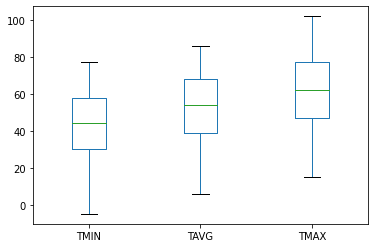

In [33]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

plt.savefig('1_box temp.png')
# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


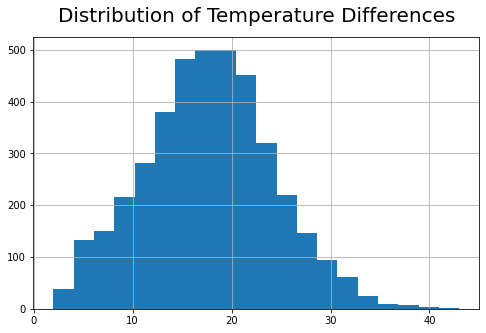

In [34]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].hist(bins=20)

plt.title("Distribution of Temperature Differences", fontsize=20, pad=15)
plt.gcf().set_size_inches(8, 5)
plt.savefig("2_histtemp")
# Display the plot
plt.show()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


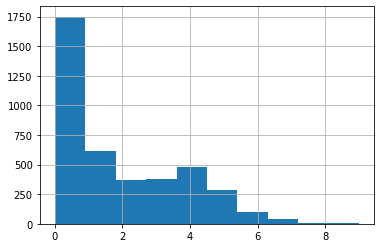

In [35]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Count the unique values in 'bad_conditions' and sort the index
print(weather['bad_conditions'].value_counts().sort_index())

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.hist()

# Display the plot
plt.show()

In [36]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [37]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather['rating'], ordered=True, categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [38]:
# Reset the index of 'ri'
police.reset_index(inplace=True)

# Examine the head of 'police'
print(police.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [39]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [40]:
# Examine the shape of 'police'
print(police.shape)

# Merge 'ri' and 'weather_rating' using a left join
police_weather = pd.merge(left=police, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'police_weather'
print(police_weather.shape)

# Set 'stop_datetime' as the index of 'police_weather'
police_weather.set_index('stop_datetime', inplace=True)

(86536, 16)
(86536, 18)


In [41]:
print(police_weather.head(4))

                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   

                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   

                     search_conducted search_type   stop_outcome  is_arrested  \
stop_datetime                                                                   
2005-01-04 12:

In [42]:
# Calculate the overall arrest rate
print("Percentage arrest rate : ", "{0:.2f}%".format(police_weather.is_arrested.mean() * 100))

Percentage arrest rate :  3.56%


In [43]:
# Calculate the arrest rate for each 'rating'
print(police_weather.groupby('rating').is_arrested.sum())

rating
good     1346
bad      1410
worse     322
Name: is_arrested, dtype: int64


In [44]:
# Save the output of the groupby operation from the last exercise
arrest_rate = police_weather.groupby(['violation', 'rating'])['is_arrested'].sum()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      303
                     bad       336
                     worse      70
Moving violation     good      414
                     bad       428
                     worse      98
Other                good      139
                     bad       172
                     worse      40
Registration/plates  good      143
                     bad       160
                     worse      37
Seat belt            good       51
                     bad        24
                     worse       0
Speeding             good      296
                     bad       290
                     worse      77
Name: is_arrested, dtype: int64


In [45]:
type(arrest_rate)

pandas.core.series.Series

In [46]:
# Print the arrest rate for moving violations in bad weather
print("the arrest rate for moving violations in bad weather is", arrest_rate.loc['Moving violation', 'bad'])

print("---------------")

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

the arrest rate for moving violations in bad weather is 428
---------------
rating
good     296
bad      290
worse     77
Name: is_arrested, dtype: int64


In [47]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating               good  bad  worse
violation                            
Equipment             303  336     70
Moving violation      414  428     98
Other                 139  172     40
Registration/plates   143  160     37
Seat belt              51   24      0
Speeding              296  290     77


In [48]:
# Create the same DataFrame using a pivot table
print(police_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
